In [1]:
import sys
sys.path.append('../')
from fetch_data import data_fetcher
import matplotlib.pyplot as plt
import numpy as np

### Table of Contents
 * [Import Data](#import_data)
     - Data Exploration

 * [Initial Regression Analysis](#linear_regression)
      - Linear Regression
      - RANSAC 
      - Lasso
      - Ridge
      - ElasticBand
 * [Principal Components Analysis](#pca_analysis)
      - Linear Regression
      - RANSAC
      - Lasso
      - Ridge
      - ElasticBand
 * [Transformation Analysis](#dimen_reduc)

#### Import Data
<a id='import_data'></a>

In [2]:
## Data with no manipulation
ros_data = data_fetcher.fetch_rossmann(norm=False,pca=False, n_components=0, n_degrees=1)
X_train, X_test, y_train, y_test = ros_data
print(len(X_train), len(y_train), len(X_test), len(y_test))

## Normalized data
ros_data_norm = data_fetcher.fetch_rossmann(norm=True,pca=False,n_components=0, n_degrees=1)
X_train_std, X_test_std, y_train_std, y_test_std = ros_data_norm
print(len(X_train_std), len(y_train_std), len(X_test_std), len(y_test_std))


## Dimensioanlly Reduced data
ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=6, n_degrees=1)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca
print(len(X_train_pca), len(y_train_pca), len(X_test_pca), len(y_test_pca))

## Of degree 2
ros_data_2 = data_fetcher.fetch_rossmann(norm=True,pca=False,n_components=0, n_degrees=2)
X_train_2, X_test_2, y_train_2, y_test_2 = ros_data_2
print(len(X_train_2), len(y_train_2), len(X_test_2), len(y_test_2))

## Of degree 3
ros_data_3 = data_fetcher.fetch_rossmann(norm=True,pca=False,n_components=0, n_degrees=3)
X_train_3, X_test_3, y_train_3, y_test_3 = ros_data_3
print(len(X_train_3), len(y_train_3), len(X_test_3), len(y_test_3))


712046 712046 305163 305163
712046 712046 305163 305163
712046 712046 305163 305163
712046 712046 305163 305163
712046 712046 305163 305163


#### Data Exploration

NOTE: For further EDA, see respective notebooks: 'data_explr_walmart/rossman'.

In [3]:
print(X_train[:10])

        Store  DayOfWeek  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
884849    971          6       1040     1      0             0              0   
701708    771          6        533     1      0             0              0   
216052    238          7          0     0      0             0              0   
7392        8          5        532     1      0             0              0   
757524    832          1        671     1      1             0              0   
561873    616          2       1028     1      1             0              0   
965604   1059          6       1045     1      0             0              0   
872887    958          2        565     1      0             0              1   
373547    410          2        882     1      1             0              0   
805940    884          4        364     1      0             0              0   

        StoreType  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
884849          3          

## Initial Regression Analysis

<a id='linear_regression'></a>

#### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import time

## NO MANIP
lr = LinearRegression()
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = LinearRegression()
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_lr = r2_score(y_train, pred_train)
r2_test_lr = r2_score(y_test, pred_test)

r2_train_std_lr = r2_score(y_train_std, pred_train_std)
r2_test_std_lr = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:             %0.5f%% " % ('LR', r2_train_lr))
print("R2 (test) for %s:              %0.5f%% " % ('LR', r2_test_lr))
print("R2 (train - STD) for %s:       %0.5f%% " % ('LR', r2_train_std_lr))
print("R2 (test - STD) for %s:        %0.5f%% \n\n" % ('LR', r2_test_std_lr))

## MSE
mse_train_lr = mean_squared_error(y_train, pred_train)
mse_test_lr = mean_squared_error(y_test, pred_test)
mse_train_std_lr = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_lr = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:              %0.5f%% " % ('LR', mse_train_lr))
print("MSE (test) for %s:               %0.5f%% " % ('LR', mse_test_lr))
print("MSE (train - STD) for %s:        %0.5f%% " % ('LR', mse_train_std_lr))
print("MSE (test - STD) for %s:         %0.5f%% " % ('LR', mse_test_std_lr))

Fit Times:
--------------------

Fit Time:        1.1488282680511475
Fit Time (STD):  0.8758010864257812

R2 Scores
---------------------

R2 (train) for LR:             0.86885% 
R2 (test) for LR:              0.86849% 
R2 (train - STD) for LR:       0.86885% 
R2 (test - STD) for LR:        0.86849% 


MSE Scores
---------------------

MSE (train) for LR:              1942357.63064% 
MSE (test) for LR:               1952638.81081% 
MSE (train - STD) for LR:        1942357.63064% 
MSE (test - STD) for LR:         1952638.81081% 


#### RANSAC

In [5]:
from sklearn.linear_model import RANSACRegressor

## NO MANIP
lr = RANSACRegressor()
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = RANSACRegressor()
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_ran = r2_score(y_train, pred_train)
r2_test_ran = r2_score(y_test, pred_test)

r2_train_std_ran = r2_score(y_train_std, pred_train_std)
r2_test_std_ran = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:              %0.5f%% " % ('RANSAC', r2_train_ran))
print("R2 (test) for %s:               %0.5f%% " % ('RANSAC', r2_test_ran))
print("R2 (train - STD) for %s:        %0.5f%% " % ('RANSAC', r2_train_std_ran))
print("R2 (test - STD) for %s:         %0.5f%% \n\n" % ('RANSAC', r2_test_std_ran))

## MSE
mse_train_ran = mean_squared_error(y_train, pred_train)
mse_test_ran = mean_squared_error(y_test, pred_test)
mse_train_std_ran = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_ran = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:             %0.5f%% " % ('RANSAC', mse_train_ran))
print("MSE (test) for %s:              %0.5f%% " % ('RANSAC', mse_test_ran))
print("MSE (train - STD) for %s:       %0.5f%% " % ('RANSAC', mse_train_std_ran))
print("MSE (test - STD) for %s:        %0.5f%% " % ('RANSAC', mse_test_std_ran))

Fit Times:
--------------------

Fit Time:        4.540108680725098
Fit Time (STD):  5.653306245803833

R2 Scores
---------------------

R2 (train) for RANSAC:              0.83958% 
R2 (test) for RANSAC:               0.83897% 
R2 (train - STD) for RANSAC:        0.36001% 
R2 (test - STD) for RANSAC:         0.34685% 


MSE Scores
---------------------

MSE (train) for RANSAC:             2375993.77318% 
MSE (test) for RANSAC:              2390940.34213% 
MSE (train - STD) for RANSAC:       9478760.97977% 
MSE (test - STD) for RANSAC:        9698025.64005% 


#### LASSO

In [6]:
from sklearn.linear_model import Lasso

## NO MANIP
lr = Lasso(alpha=.1)
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = Lasso()
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

r2_train_std = r2_score(y_train_std, pred_train_std)
r2_test_std = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:          %0.5f%% " % ('LR', r2_train))
print("R2 (test) for %s:           %0.5f%% " % ('LR', r2_test))
print("R2 (train - STD) for %s:    %0.5f%% " % ('LR', r2_train_std))
print("R2 (test - STD) for %s:     %0.5f%% \n\n" % ('LR', r2_test_std))

## MSE
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mse_train_std = mean_squared_error(y_train_std, pred_train_std)
mse_test_std = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:           %0.5f%% " % ('LR', mse_train))
print("MSE (test) for %s:            %0.5f%% " % ('LR', mse_test))
print("MSE (train - STD) for %s:     %0.5f%% " % ('LR', mse_train_std))
print("MSE (test - STD) for %s:      %0.5f%% " % ('LR', mse_test_std))

Fit Times:
--------------------

Fit Time:        34.641419649124146
Fit Time (STD):  3.1670172214508057

R2 Scores
---------------------

R2 (train) for LR:          0.86858% 
R2 (test) for LR:           0.86823% 
R2 (train - STD) for LR:    0.86857% 
R2 (test - STD) for LR:     0.86822% 


MSE Scores
---------------------

MSE (train) for LR:           1946489.45124% 
MSE (test) for LR:            1956588.13373% 
MSE (train - STD) for LR:     1946530.43130% 
MSE (test - STD) for LR:      1956651.61804% 


#### Ridge

In [7]:
from sklearn.linear_model import Ridge

## NO MANIP
lr = Ridge(alpha=1.0)
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = Ridge(alpha=1.0)
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_rid = r2_score(y_train, pred_train)
r2_test_rid = r2_score(y_test, pred_test)

r2_train_std_rid = r2_score(y_train_std, pred_train_std)
r2_test_std_rid = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:         %0.5f%% " % ('Ridge', r2_train_rid))
print("R2 (test) for %s:          %0.5f%% " % ('Ridge', r2_test_rid))
print("R2 (train - STD) for %s:   %0.5f%% " % ('Ridge', r2_train_std_rid))
print("R2 (test - STD) for %s:    %0.5f%% \n\n" % ('Ridge', r2_test_std_rid))

## MSE
mse_train_rid = mean_squared_error(y_train, pred_train)
mse_test_rid = mean_squared_error(y_test, pred_test)
mse_train_std_rid = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_rid = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:         %0.5f%% " % ('Ridge', mse_train_rid))
print("MSE (test) for %s:          %0.5f%% " % ('Ridge', mse_test_rid))
print("MSE (train - STD) for %s:   %0.5f%% " % ('Ridge', mse_train_std_rid))
print("MSE (test - STD) for %s:    %0.5f%% " % ('Ridge', mse_test_std_rid))

Fit Times:
--------------------

Fit Time:        0.37673330307006836
Fit Time (STD):  0.21569466590881348

R2 Scores
---------------------

R2 (train) for Ridge:         0.86867% 
R2 (test) for Ridge:          0.86832% 
R2 (train - STD) for Ridge:   0.86872% 
R2 (test - STD) for Ridge:    0.86837% 


MSE Scores
---------------------

MSE (train) for Ridge:         1945105.60110% 
MSE (test) for Ridge:          1955240.67020% 
MSE (train - STD) for Ridge:   1944316.73712% 
MSE (test - STD) for Ridge:    1954474.98181% 


#### ElasticNet

In [8]:
from sklearn.linear_model import ElasticNet

## NO MANIP
lr = ElasticNet(alpha=1.0, l1_ratio=0.5)
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = ElasticNet(alpha=1.0)
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_eln = r2_score(y_train, pred_train)
r2_test_eln = r2_score(y_test, pred_test)

r2_train_std_eln = r2_score(y_train_std, pred_train_std)
r2_test_std_eln = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:            %0.5f%% " % ('ElasticNet', r2_train_eln))
print("R2 (test) for %s:             %0.5f%% " % ('ElasticNet', r2_test_eln))
print("R2 (train - STD) for %s:      %0.5f%% " % ('ElasticNet', r2_train_std_eln))
print("R2 (test - STD) for %s:       %0.5f%% \n\n" % ('ElasticNet', r2_test_std_eln))

## MSE
mse_train_eln = mean_squared_error(y_train, pred_train)
mse_test_eln = mean_squared_error(y_test, pred_test)
mse_train_std_eln = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_eln = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:            %0.5f%% " % ('ElasticNet', mse_train_eln))
print("MSE (test) for %s:             %0.5f%% " % ('ElasticNet', mse_test_eln))
print("MSE (train - STD) for %s:      %0.5f%% " % ('ElasticNet', mse_train_std_eln))
print("MSE (test - STD) for %s:       %0.5f%% " % ('ElasticNet', mse_test_std_eln))

Fit Times:
--------------------

Fit Time:        4.019611358642578
Fit Time (STD):  0.5693569183349609

R2 Scores
---------------------

R2 (train) for ElasticNet:            0.84921% 
R2 (test) for ElasticNet:             0.84883% 
R2 (train - STD) for ElasticNet:      0.80531% 
R2 (test - STD) for ElasticNet:       0.80491% 


MSE Scores
---------------------

MSE (train) for ElasticNet:            2233267.81945% 
MSE (test) for ElasticNet:             2244603.95657% 
MSE (train - STD) for ElasticNet:      2883490.12578% 
MSE (test - STD) for ElasticNet:       2896627.85315% 


## PCA
<a id='pca_analysis'></a>

Let's look at how R^2 and MSE are affected by Principal Components Analysis.

For each dataset, we will explore all possible values for the hyperparameter 'n_components', from 1 to n-1. (n being the number of features in the respective dataset)

#### Linear Regression

In [9]:

## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

r2_max=0

## For each of our features 
for i in range(1,19):
    ## Dimensioanlly Reduced data
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca

    lr = LinearRegression() 
    st = time.time()
    lr.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = lr.predict(X_train_pca)
    pred_test_pca = lr.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    if (r2_train_pca>r2_max):
        r2_max=r2_train_pca

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time (STD): ', fit_time_std[19])

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:            %0.5f%% " % ('ElasticNet', r2_train_eln))
print("R2 (test) for %s:             %0.5f%% " % ('ElasticNet', r2_test_eln))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\brock\AppData\Local\Temp\ipykernel_29892\1955712584.py", line 14, in <cell line: 12>
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 216, in fetch_rossmann
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 66, in import_data_rossmann
    samp = pd.read_csv('rossmann_data/sample_submission.csv')
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\brock\AppData\Local\Programs\Python\Pytho

#### RANSAC

In [10]:

## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,19):
    ## Dimensioanlly Reduced data
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca

    rs = RANSACRegressor() 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    print('Slope: %.3f' %rs.estimator_.coef_[0])
    print ('Intercept : %.3f' %rs.estimator_ . intercept_ ) 

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\brock\AppData\Local\Temp\ipykernel_29892\3566318081.py", line 12, in <cell line: 10>
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 216, in fetch_rossmann
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 66, in import_data_rossmann
    samp = pd.read_csv('rossmann_data/sample_submission.csv')
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\brock\AppData\Local\Programs\Python\Pytho

#### LASSO

In [11]:
## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,19):
    ## Dimensioanlly Reduced data
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca

    rs = Lasso() 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\brock\AppData\Local\Temp\ipykernel_29892\2602974866.py", line 12, in <cell line: 10>
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 216, in fetch_rossmann
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 66, in import_data_rossmann
    samp = pd.read_csv('rossmann_data/sample_submission.csv')
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\brock\AppData\Local\Programs\Python\Pytho

#### Ridge

In [12]:
## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,19):
    ## Dimensioanlly Reduced data
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca

    rs = Ridge(alpha=1.0) 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\brock\AppData\Local\Temp\ipykernel_29892\2766669084.py", line 12, in <cell line: 10>
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 216, in fetch_rossmann
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 66, in import_data_rossmann
    samp = pd.read_csv('rossmann_data/sample_submission.csv')
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\brock\AppData\Local\Programs\Python\Pytho

#### ElasticNet

In [13]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,19):
    ## Dimensioanlly Reduced data
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca

    rs = ElasticNet(alpha=1.0, l1_ratio=0.5) 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\brock\AppData\Local\Temp\ipykernel_29892\1180841196.py", line 12, in <cell line: 10>
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 216, in fetch_rossmann
  File "c:\Users\brock\OneDrive\Desktop\AML487\Project\Applied_Machine_Learning_NMSU\linear_reg\..\fetch_data.py", line 66, in import_data_rossmann
    samp = pd.read_csv('rossmann_data/sample_submission.csv')
  File "c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\brock\AppData\Local\Programs\Python\Pytho

## Transformation Analysis
<a id='dimen_reduc'></a>

#### Linear Regression

In [14]:
## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = ros_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = ros_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = ros_data_3


## DEGREE 1 
lr = LinearRegression() 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = LinearRegression() 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)
## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = LinearRegression() 
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")

MemoryError: Unable to allocate 8.16 GiB for an array with shape (712046, 1539) and data type float64

#### RANSAC

Text(0.5, 1.0, 'MSE by features')

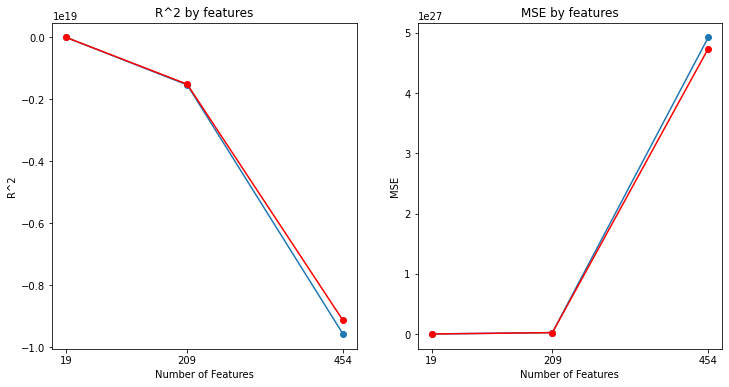

In [ ]:
## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = ros_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = ros_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = ros_data_3


## DEGREE 1 
lr = RANSACRegressor() 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = RANSACRegressor() 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)
## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = RANSACRegressor() 
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")

#### Lasso

c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+11, tolerance: 1.055e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.350e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'MSE by features')

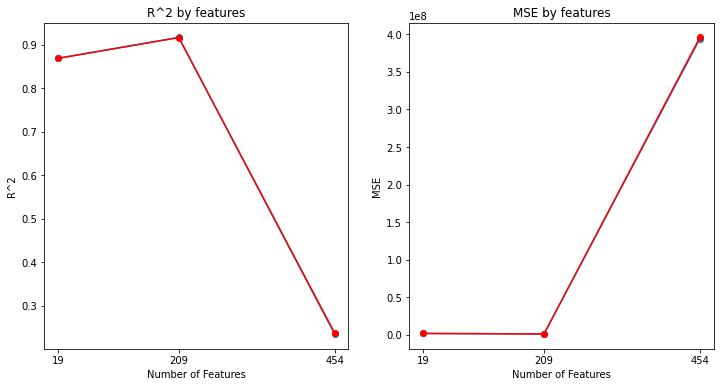

In [ ]:
## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = ros_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = ros_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = ros_data_3


## DEGREE 1 
lr = Lasso() 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = Lasso() 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)
## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = Lasso() 
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")

#### Ridge

Text(0.5, 1.0, 'MSE by features')

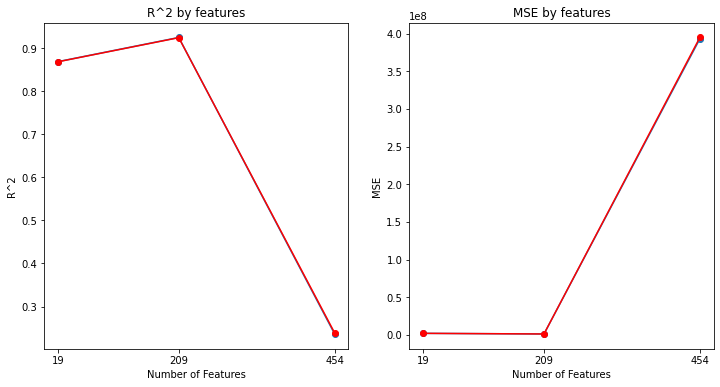

In [ ]:
## Rossmann
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = ros_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = ros_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = ros_data_3


## DEGREE 1 
lr = Ridge() 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = Ridge()
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)
## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = Ridge() 
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")

#### ElasticNet

## Combined Metric

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear']
['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear']
['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear']
['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDi

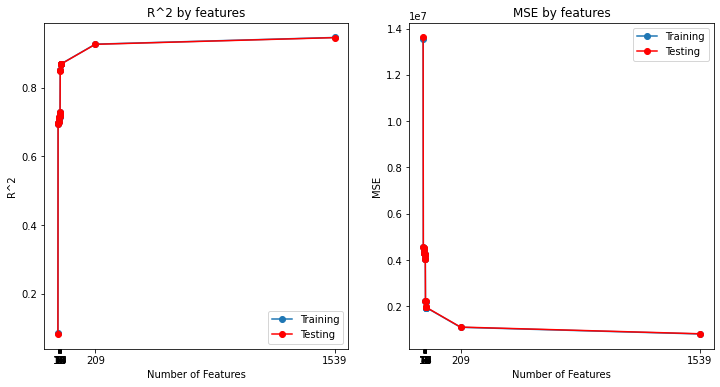

In [ ]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

from sklearn.linear_model import LinearRegression
## For each of our features 
for i in range(1,19):
    ## Dimensioanlly Reduced data
    ros_data_pca = data_fetcher.fetch_rossmann(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = ros_data_pca

    rs = LinearRegression() 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = ros_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = ros_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = ros_data_3

## DEGREE 1 
lr = LinearRegression() 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = LinearRegression() 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)

## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = LinearRegression()
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")

ax[0].legend()
ax[1].legend()

Degree 3 R^2 (train):  0.9456086146976616
Degree 3 R^2 (test):  0.9451310863399447


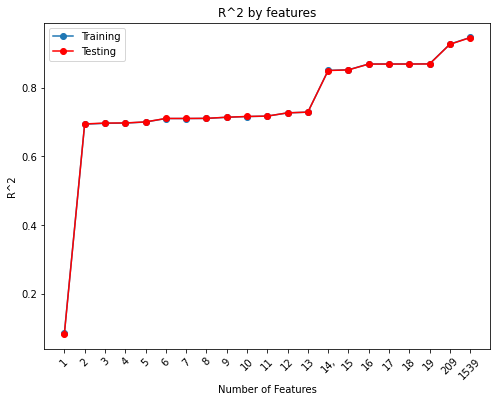

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

print("Degree 3 R^2 (train): ", r2_train_3)
print("Degree 3 R^2 (test): ", r2_test_3)
# plot r2 results
ax.plot(comp_num, r2_train, marker='o', label="Training")
ax.plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax.set_xticks(comp_num)
ax.set_ylabel("R^2")
ax.set_xlabel("Number of Features")
ax.set_title("R^2 by features")

x_ticks=['1','2','3','4','5','6','7','8','9','10','11','12','13','14,','15','16','17','18','19','209','1539']
ax.set_xticks(comp_num)
ax.set_xticklabels(x_ticks, rotation=45)

# plot mse results
# ax[1].plot(comp_num, mse_train, marker='o', label="Training")
# ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
# ax[1].set_xticks(comp_num)
# ax[1].set_ylabel("MSE")
# ax[1].set_xlabel("Number of Features")
# ax[1].set_title("MSE by features")

# ax[1].set_xticklabels(x_ticks, rotation=45)

ax.legend()
# ax[1].legend()

plt.show()

In [ ]:
print(comp_num)
comp_num[19] = 20
comp_num[20] = 21


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [ ]:
## DEGREE 3
lr = LinearRegression()
st=time.time()
lr.fit(X_train_3, y_train_3)
en=time.time()

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)

print(en-st)


MemoryError: Unable to allocate 8.16 GiB for an array with shape (712046, 1539) and data type float64